In [1]:
!mkdir CSV
!wget -P CSV/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/REVIEWSOCO_ASPEKSENT.csv

--2021-08-12 21:07:07--  https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/REVIEWSOCO_ASPEKSENT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287899 (281K) [text/plain]
Saving to: ‘CSV/REVIEWSOCO_ASPEKSENT.csv’

REVIEWSOCO_ASPEKSEN 100%[===================>] 281.15K  --.-KB/s    in 0.04s   

2021-08-12 21:07:07 (7.11 MB/s) - ‘CSV/REVIEWSOCO_ASPEKSENT.csv’ saved [287899/287899]



In [2]:
import seaborn as sns
import pandas as pd
sns.set_style("white")

In [3]:
df = pd.read_csv('CSV/REVIEWSOCO_ASPEKSENT.csv')
df.head()

,At,Review,Bintang,Sentimen,Aspek
0,2020-10-18 19:32:19,gud,5,Positif,Lainnya
1,2020-10-17 20:18:47,"Seneng belanja disini karna dah pastinya ori, ...",5,Positif,Layanan
2,2020-10-17 07:44:22,"Pertamakali order langsung kecewa, di cancel k...",1,Negatif,Layanan
3,2020-10-17 05:29:05,Sociolla parah. Proses refund gak tau harus nu...,1,Negatif,Layanan
4,2020-10-17 00:12:18,Sy order 4 product di tanggal 11 september dan...,1,Negatif,Layanan


# **KELAS SENTIMEN**

In [4]:
df['At'] = pd.to_datetime(df['At'])
datesen_counts = (df.groupby(pd.Grouper(key='At', freq='4MS'))['Sentimen']
                  .value_counts()
                  .rename('Data')
                  .reset_index()
                  .sort_values('At'))
datesen_counts['At'] = pd.to_datetime(datesen_counts["At"].dt.strftime('%Y-%m')).dt.to_period('m')
datesen_counts['At'] = datesen_counts['At'].dt.strftime('%Y-%m')
print(datesen_counts)

         At Sentimen  Data
0   2019-04  Negatif   406
1   2019-04  Positif   306
2   2019-04   Netral   122
3   2019-08  Positif   292
4   2019-08  Negatif   151
5   2019-08   Netral    69
6   2019-12  Negatif   180
7   2019-12  Positif   104
8   2019-12   Netral    51
9   2020-04  Negatif   104
10  2020-04  Positif    89
11  2020-04   Netral    22
12  2020-08  Positif    90
13  2020-08  Negatif    64
14  2020-08   Netral    23


Visualisasi Kelas Sentimen Periode 4 Bulan


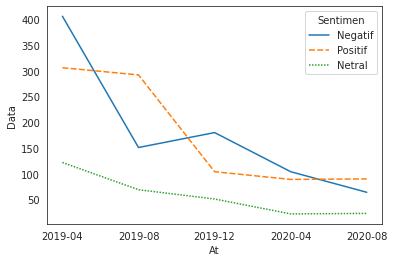

In [5]:
import seaborn as sns
print("Visualisasi Kelas Sentimen Periode 4 Bulan")
p = sns.lineplot(x="At", y ="Data", hue="Sentimen", style="Sentimen", data = datesen_counts)

# **KELAS SENTIMEN TERHADAP ASPEK**

#### **KELAS SENTIMEN POSITIF TERHADAP ASPEK** **bold text**

In [6]:
df['At'] = pd.to_datetime(df['At'])
aspek_counts = (df.groupby([pd.Grouper(key='At', freq='4MS'), df['Aspek']], sort = True)['Sentimen']
                  .value_counts()
                  .rename('Data')
                  .reset_index()
                  .sort_values('At'))
aspek_counts['At'] = pd.to_datetime(aspek_counts["At"].dt.strftime('%Y-%m')).dt.to_period('m')
aspek_counts['At'] = aspek_counts['At'].dt.strftime('%Y-%m')
aspek_counts = aspek_counts[aspek_counts['Sentimen'] == 'Positif']
aspek_counts['Sentimen'] = aspek_counts['Sentimen'].apply(str)
print(aspek_counts)

         At     Aspek Sentimen  Data
0   2019-04   Lainnya  Positif   199
10  2019-04  Tampilan  Positif    30
6   2019-04    Produk  Positif    37
3   2019-04   Layanan  Positif    40
22  2019-08  Tampilan  Positif    33
17  2019-08    Produk  Positif    42
14  2019-08   Layanan  Positif    48
11  2019-08   Lainnya  Positif   169
34  2019-12  Tampilan  Positif    25
29  2019-12    Produk  Positif    10
27  2019-12   Layanan  Positif    13
23  2019-12   Lainnya  Positif    56
45  2020-04  Tampilan  Positif    10
41  2020-04    Produk  Positif    20
35  2020-04   Lainnya  Positif    43
39  2020-04   Layanan  Positif    16
52  2020-08    Produk  Positif    10
46  2020-08   Lainnya  Positif    44
56  2020-08  Tampilan  Positif    14
50  2020-08   Layanan  Positif    22


Visualisasi Kelas Sentimen Positif Tiap Aspek Periode 4 Bulan


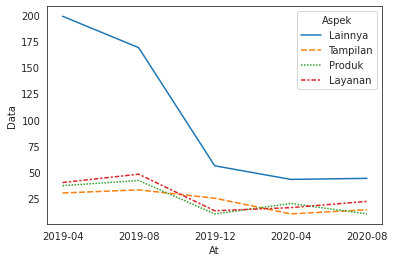

In [7]:
print("Visualisasi Kelas Sentimen Positif Tiap Aspek Periode 4 Bulan")
p = sns.lineplot(x="At", y ="Data", hue="Aspek", style="Aspek", data = aspek_counts)

#### **KELAS SENTIMEN NEGATIF TERHADAP ASPEK**

In [8]:
df['At'] = pd.to_datetime(df['At'])
aspek_counts = (df.groupby([pd.Grouper(key='At', freq='4MS'), df['Aspek']], sort = True)['Sentimen']
                  .value_counts()
                  .rename('Data')
                  .reset_index()
                  .sort_values('At'))
aspek_counts['At'] = pd.to_datetime(aspek_counts["At"].dt.strftime('%Y-%m')).dt.to_period('m')
aspek_counts['At'] = aspek_counts['At'].dt.strftime('%Y-%m')
aspek_counts = aspek_counts[aspek_counts['Sentimen'] == 'Negatif']
aspek_counts['Sentimen'] = aspek_counts['Sentimen'].apply(str)
print(aspek_counts)

         At     Aspek Sentimen  Data
7   2019-04    Produk  Negatif     1
8   2019-04  Tampilan  Negatif   285
4   2019-04   Layanan  Negatif    21
1   2019-04   Lainnya  Negatif    99
18  2019-08    Produk  Negatif     2
20  2019-08  Tampilan  Negatif   104
15  2019-08   Layanan  Negatif    20
12  2019-08   Lainnya  Negatif    25
30  2019-12    Produk  Negatif     1
32  2019-12  Tampilan  Negatif   132
26  2019-12   Layanan  Negatif    26
24  2019-12   Lainnya  Negatif    21
42  2020-04    Produk  Negatif     6
43  2020-04  Tampilan  Negatif    52
38  2020-04   Layanan  Negatif    36
36  2020-04   Lainnya  Negatif    10
55  2020-08  Tampilan  Negatif    19
53  2020-08    Produk  Negatif     2
49  2020-08   Layanan  Negatif    39
47  2020-08   Lainnya  Negatif     4


TVisualisasi Kelas Sentimen Negatif Tiap Aspek Periode 4 Bulan


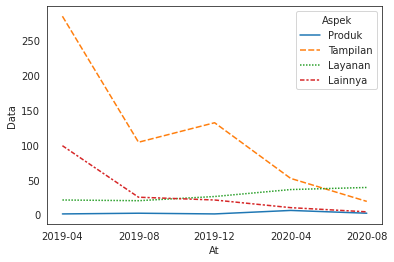

In [9]:
print("TVisualisasi Kelas Sentimen Negatif Tiap Aspek Periode 4 Bulan")
p = sns.lineplot(x="At", y ="Data", hue="Aspek", style="Aspek", data = aspek_counts)

#### **VISUALISASI PERBANDINGAN SENTIMEN POSITIF - NEGATIF TERHADAP ASPEK**

In [10]:
#Perbandingan antara positif dan negatif
df['At'] = pd.to_datetime(df['At'])
aspek_counts_p = (df.groupby([pd.Grouper(key='At', freq='4MS'), df['Aspek']], sort = True)['Sentimen']
                  .value_counts()
                  .rename('Data')
                  .reset_index()
                  .sort_values('At'))
aspek_counts_p['At'] = pd.to_datetime(aspek_counts_p["At"].dt.strftime('%Y-%m')).dt.to_period('m')
aspek_counts_p['At'] = aspek_counts_p['At'].dt.strftime('%Y-%m')
aspek_counts_p = aspek_counts_p[aspek_counts_p['Sentimen'] == 'Positif']
aspek_counts_p['Sentimen'] = aspek_counts_p['Sentimen'].apply(str)
aspek_counts_p['Data'] = aspek_counts_p['Data'].apply(int)


aspek_counts_n = (df.groupby([pd.Grouper(key='At', freq='4M'), df['Aspek']], sort = True)['Sentimen']
                  .value_counts()
                  .rename('Data')
                  .reset_index()
                  .sort_values('At'))
aspek_counts_n['At'] = pd.to_datetime(aspek_counts_n["At"].dt.strftime('%Y-%m')).dt.to_period('m')
aspek_counts_n['At'] = aspek_counts_n['At'].dt.strftime('%Y-%m')
aspek_counts_n = aspek_counts_n[aspek_counts_n['Sentimen'] == 'Negatif']
aspek_counts_n['Sentimen'] = aspek_counts_n['Sentimen'].apply(str)
aspek_counts_n['Data'] = aspek_counts_n['Data'].apply(int)

aspek_counts_p = aspek_counts_p.reset_index(drop=True)
aspek_counts_n = aspek_counts_n.reset_index(drop=True)
print(aspek_counts_p)

         At     Aspek Sentimen  Data
0   2019-04   Lainnya  Positif   199
1   2019-04  Tampilan  Positif    30
2   2019-04    Produk  Positif    37
3   2019-04   Layanan  Positif    40
4   2019-08  Tampilan  Positif    33
5   2019-08    Produk  Positif    42
6   2019-08   Layanan  Positif    48
7   2019-08   Lainnya  Positif   169
8   2019-12  Tampilan  Positif    25
9   2019-12    Produk  Positif    10
10  2019-12   Layanan  Positif    13
11  2019-12   Lainnya  Positif    56
12  2020-04  Tampilan  Positif    10
13  2020-04    Produk  Positif    20
14  2020-04   Lainnya  Positif    43
15  2020-04   Layanan  Positif    16
16  2020-08    Produk  Positif    10
17  2020-08   Lainnya  Positif    44
18  2020-08  Tampilan  Positif    14
19  2020-08   Layanan  Positif    22


In [11]:
print(aspek_counts_n)

         At     Aspek Sentimen  Data
0   2019-04   Lainnya  Negatif    64
1   2019-04   Layanan  Negatif     6
2   2019-04  Tampilan  Negatif   189
3   2019-08  Tampilan  Negatif   110
4   2019-08    Produk  Negatif     2
5   2019-08   Layanan  Negatif    18
6   2019-08   Lainnya  Negatif    36
7   2019-12    Produk  Negatif     1
8   2019-12  Tampilan  Negatif   138
9   2019-12   Layanan  Negatif    28
10  2019-12   Lainnya  Negatif    33
11  2020-04  Tampilan  Negatif    99
12  2020-04    Produk  Negatif     3
13  2020-04   Layanan  Negatif    29
14  2020-04   Lainnya  Negatif    15
15  2020-08  Tampilan  Negatif    45
16  2020-08    Produk  Negatif     4
17  2020-08   Lainnya  Negatif    11
18  2020-08   Layanan  Negatif    39
19  2020-12  Tampilan  Negatif    11
20  2020-12   Layanan  Negatif    22
21  2020-12    Produk  Negatif     2


In [12]:
perbandingan = pd.DataFrame()
perbandingan['At'] = aspek_counts_p['At'].tolist()
perbandingan['Aspek'] = aspek_counts_p['Aspek'].tolist()
perbandingan['Data'] = aspek_counts_p['Data'].sub(aspek_counts_n['Data'], fill_value=0)
print(perbandingan)

         At     Aspek   Data
0   2019-04   Lainnya  135.0
1   2019-04  Tampilan   24.0
2   2019-04    Produk -152.0
3   2019-04   Layanan  -70.0
4   2019-08  Tampilan   31.0
5   2019-08    Produk   24.0
6   2019-08   Layanan   12.0
7   2019-08   Lainnya  168.0
8   2019-12  Tampilan -113.0
9   2019-12    Produk  -18.0
10  2019-12   Layanan  -20.0
11  2019-12   Lainnya  -43.0
12  2020-04  Tampilan    7.0
13  2020-04    Produk   -9.0
14  2020-04   Lainnya   28.0
15  2020-04   Layanan  -29.0
16  2020-08    Produk    6.0
17  2020-08   Lainnya   33.0
18  2020-08  Tampilan  -25.0
19  2020-08   Layanan   11.0


Visualisasi Kelas Aspek Perbandingan Sentimen Positif dan Negatif Periode 4 bulan


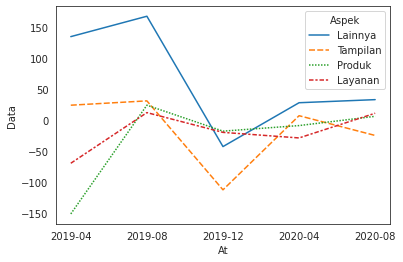

In [13]:
print("Visualisasi Kelas Aspek Perbandingan Sentimen Positif dan Negatif Periode 4 bulan")
p = sns.lineplot(x="At", y ="Data", hue="Aspek", style="Aspek", data = perbandingan)